In [1]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
states = gpd.read_file("./cb_2018_us_state_500k/cb_2018_us_state_500k.shp") # Path to the shapefile
print(states["NAME"]) # print out state names

0                                      Mississippi
1                                   North Carolina
2                                         Oklahoma
3                                         Virginia
4                                    West Virginia
5                                        Louisiana
6                                         Michigan
7                                    Massachusetts
8                                            Idaho
9                                          Florida
10                                        Nebraska
11                                      Washington
12                                      New Mexico
13                                     Puerto Rico
14                                    South Dakota
15                                           Texas
16                                      California
17                                         Alabama
18                                         Georgia
19                             

In [3]:
# remove territories, etc.
remove_states = ["Puerto Rico",
                 "District of Columbia",
                 "American Samoa",
                 "United States Virgin Islands",
                 "Guam",
                 "Commonwealth of the Northern Mariana Islands",
                ]

# create new df of just states
just_states = states[~states["NAME"].isin(remove_states)].reset_index()

just_states

,index,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."
5,5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2..."
6,6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [4]:
# separate single and multipolygon states
single_states = ["Oklahoma",
                 "West Virginia",
                 "Idaho",
                 "Nebraska",
                 "New Mexico",
                 "South Dakota",
                 "Pennsylvania",
                 "Missouri",
                 "Colorado",
                 "Utah",
                 "Tennessee",
                 "Wyoming",
                 "Kansas",
                 "Nevada",
                 "Illinois",
                 "Vermont",
                 "Montana",
                 "Iowa",
                 "Arizona",
                 "New Jersey",
                 "North Dakota",
                 "Arkansas",
                 "Indiana"]

multi_states = [
                "Alaska",
                "Hawaii",
                "Mississippi",
                "North Carolina",
                "Virginia",
                "Louisiana",
                "Michigan",
                "Massachusetts",
                "Florida",
                "Washington",
                "Texas",
                "California",
                "Alabama",
                "Georgia",
                "New York",
                "South Carolina",
                "New Hampshire",
                "Maryland",
                "Maine",
                "Delaware",
                "Rhode Island",
                "Kentucky",
                "Ohio",
                "Wisconsin",
                "Oregon",
                "Minnesota",
                "Connecticut"]

# Retrieve polygons

### Single polygons

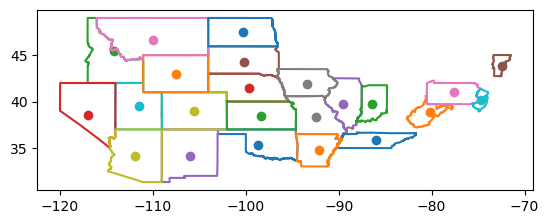

In [5]:
state_names_s = [] # lists to store data from single polygon states
state_coords_s = []
state_centroids_s = []

for s in single_states:

    curr_state=s # select current state
    curr_coords = just_states[just_states["NAME"]==curr_state].get_coordinates() # get coordinates as dataframe
    curr_coord_list = [list(curr_coords["x"]), list(curr_coords["y"])] # convert to list of lists
    
    # get centroid
    cen_x_val = (min(curr_coord_list[0])+max(curr_coord_list[0]))/2
    cen_y_val = (min(curr_coord_list[1])+max(curr_coord_list[1]))/2
    curr_centroid = [cen_x_val, cen_y_val]

    # save data
    state_names_s.append(curr_state)
    state_coords_s.append(curr_coord_list)
    state_centroids_s.append(curr_centroid)
    
    # check plot
    plt.plot(curr_coord_list[0], curr_coord_list[1])
    plt.scatter(curr_centroid[0], curr_centroid[1])
    plt.gca().set_aspect("equal")

### Multipolygons

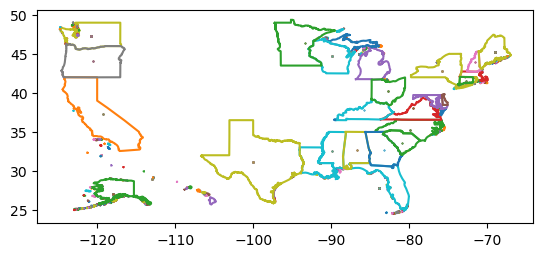

In [6]:
# info for scaling and translating Alaska
ak_scale=0.2
ak_xval = -118
ak_yval = 27

# info for scaling and translating Hawaii
hi_scale=0.7
hi_xval = -113
hi_yval = 29

################

state_names_m = [] # lists to store data from multipolygon states
state_coords_m = []
state_centroids_m = []

for m in multi_states:

    curr_state=m # select current state
    curr_df = just_states[just_states["NAME"]==curr_state] # get coordinates as dataframe
    
    # expand polygons
    polys = (
        gpd.GeoSeries(
            curr_df.dropna()["geometry"].apply(lambda g: g.geoms).explode()
        )
        .reset_index(drop=True)
    )
    
    # get coordinates for each polygon
    curr_coords = []
    for geom in polys:
        curr_coords.append(list(geom.exterior.coords))

    if curr_state=="Alaska": # remove bad islands from Alaska data
        curr_coords = curr_coords[14:]
    
    # unzip coordinates and create list of list of coordinates
    curr_coord_list = []
    for i in range(len(curr_coords)):
        unzipped_coord = list(zip(*curr_coords[i]))
        unzipped_list = [list(unzipped_coord)[0],list(unzipped_coord)[1]]
        curr_coord_list.append(unzipped_list)
    
    # calcualte the centroid of bounding box
    cen_x_vals = []
    cen_y_vals = []
    for i in range(len(curr_coord_list)):
        for j in range(len(curr_coord_list[i][0])):
            cen_x_vals.append(curr_coord_list[i][0][j])
        for k in range(len(curr_coord_list[i][1])):
            cen_y_vals.append(curr_coord_list[i][1][k])
    cen_x_val = (min(cen_x_vals)+max(cen_x_vals))/2
    cen_y_val = (min(cen_y_vals)+max(cen_y_vals))/2
    curr_centroid = [cen_x_val, cen_y_val]

    if curr_state=="Alaska": # translate and scale Alaska
        ak_coord_list = []
        for i in range(len(curr_coord_list)):
            ak_coord_x = list((np.array(curr_coord_list[i][0])-curr_centroid[0])*ak_scale+ak_xval)
            ak_coord_y = list((np.array(curr_coord_list[i][1])-curr_centroid[1])*ak_scale+ak_yval)
            ak_coord_list.append([ak_coord_x, ak_coord_y])
        curr_coord_list = ak_coord_list
        curr_centroid = [ak_xval, ak_yval]

    if curr_state=="Hawaii": # translate and scale Hawaii
        hi_coord_list = []
        for i in range(len(curr_coord_list)):
            hi_coord_x = list((np.array(curr_coord_list[i][0])-curr_centroid[0])*hi_scale+hi_xval)
            hi_coord_y = list((np.array(curr_coord_list[i][1])-curr_centroid[1])*hi_scale+hi_yval)
            hi_coord_list.append([hi_coord_x, hi_coord_y])
        curr_coord_list = hi_coord_list
        curr_centroid = [hi_xval, hi_yval]

    # save data
    state_names_m.append(curr_state)
    state_coords_m.append(curr_coord_list)
    state_centroids_m.append(curr_centroid)
        
    # check plot
    for i in range(len(curr_coord_list)):
        plt.plot(curr_coord_list[i][0], curr_coord_list[i][1])
        plt.scatter(curr_centroid[0], curr_centroid[1], s=0.1)
        plt.gca().set_aspect("equal")


# Get grid points

In [7]:
#################################
#################################
#################################
# SET THE STEP VALUE FOR THE GRID
step = 0.17
#################################
#################################
#################################

### Single polygon grid

In [8]:
state_grid_s = []

for i in range(len(state_names_s)):

    print(state_names_s[i])

    curr_coords_x = state_coords_s[i][0]
    curr_coords_y = state_coords_s[i][1]

    # create grid of points
    minx = min(curr_coords_x)
    maxx = max(curr_coords_x)
    miny = min(curr_coords_y)
    maxy = max(curr_coords_y) 
    x_range = np.arange(minx, maxx, step)
    y_range = np.arange(miny, maxy, step)
    grid_x = []
    grid_y = []
    for i in x_range:
        for j in y_range:
            grid_x.append(i)
            grid_y.append(j)
    
    # create shapely polygon
    sh_poly = []
    for i in range(len(curr_coords_x)):
        sh_poly.append( (curr_coords_x[i],curr_coords_y[i]) )
    poly_s = Polygon(sh_poly)
    
    # retrieve points in shapely polygon
    x_points = []
    y_points = []
    for i in range(len(grid_x)):
        pt = Point(grid_x[i], grid_y[i])
        if poly_s.contains(pt):
            x_points.append(grid_x[i])
            y_points.append(grid_y[i])
        else:
            continue

    # save the grid points
    state_grid_s.append([x_points, y_points])


Oklahoma
West Virginia
Idaho
Nebraska
New Mexico
South Dakota
Pennsylvania
Missouri
Colorado
Utah
Tennessee
Wyoming
Kansas
Nevada
Illinois
Vermont
Montana
Iowa
Arizona
New Jersey
North Dakota
Arkansas
Indiana


### Multipolygon grid

In [9]:
state_grid_m = []

for i in range(len(state_names_m)):

    print(state_names_m[i])

    curr_m_state_coords = state_coords_m[i]

    x_polys = [] # save polygons
    y_polys = [] 
    for j in range(len(curr_m_state_coords)): # for each polygon 
        curr_poly = curr_m_state_coords[j]
        x_polys.append(curr_poly[0]) # save the current poly
        y_polys.append(curr_poly[1])
        
    # flatten polygons to find min and max for grid
    flat_x = []
    flat_y = []
    for k in range(len(x_polys)):
        curr_xpoly = x_polys[k]
        curr_ypoly = y_polys[k]
        for l in range(len(curr_xpoly)):
            flat_x.append(curr_xpoly[l])
            flat_y.append(curr_ypoly[l])

    # create grid of points
    minx = min(flat_x)
    maxx = max(flat_x)
    miny = min(flat_y)
    maxy = max(flat_y) 
    x_range = np.arange(minx, maxx, step)
    y_range = np.arange(miny, maxy, step)
    grid_x = []
    grid_y = []
    for m in x_range:
        for n in y_range:
            grid_x.append(m)
            grid_y.append(n)

    # create shapely multipolygon
    multi_list = [] # list of Polygons for MultiPolygon
    for o in range(len(x_polys)):

        curr_xpoly = x_polys[o]
        curr_ypoly = y_polys[o]
        
        sh_poly = []
        for p in range(len(curr_xpoly)):
            sh_poly.append( (curr_xpoly[p],curr_ypoly[p]) )
            
        poly_m = Polygon(sh_poly)
        multi_list.append(poly_m)
        
    multi_poly = MultiPolygon(multi_list)

    # retrieve points in shapely polygon
    x_points = []
    y_points = []
    for q in range(len(grid_x)):
        pt = Point(grid_x[q], grid_y[q])
        if multi_poly.contains(pt):
            x_points.append(grid_x[q])
            y_points.append(grid_y[q])
        else:
            continue

    # save the grid points
    state_grid_m.append([x_points, y_points])

Alaska
Hawaii
Mississippi
North Carolina
Virginia
Louisiana
Michigan
Massachusetts
Florida
Washington
Texas
California
Alabama
Georgia
New York
South Carolina
New Hampshire
Maryland
Maine
Delaware
Rhode Island
Kentucky
Ohio
Wisconsin
Oregon
Minnesota
Connecticut


### Set order of grid points

In [14]:
state_names = state_names_s + state_names_m
state_grid = state_grid_s + state_grid_m

In [15]:
grid_lens = [] # store the length of each grid
grid_ordered = [] # store the ordered coords for each grid

for i in range(len(state_names)):

    curr_state=state_names[i]
    
    curr_grid = state_grid[i]
    curr_grid_x = curr_grid[0]
    curr_grid_y = curr_grid[1]
    
    mean_grid_x = sum(curr_grid_x)/len(curr_grid_x)
    mean_grid_y = sum(curr_grid_y)/len(curr_grid_y)
    
    dists = []
    for j in range(len(curr_grid_x)):
        dists.append(np.sqrt((curr_grid_x[j]-mean_grid_x)**2 + (curr_grid_y[j]-mean_grid_y)**2))
    
    indices = np.argsort(dists)
    grid_lens.append(len(indices))
    
    grid_x = []
    grid_y = []
    for k in indices:
        grid_x.append(curr_grid_x[k])
        grid_y.append(curr_grid_y[k])
    
    grid_ordered.append([grid_x, grid_y])
    
    

# Get colors of grid points

In [124]:
# adjust factor keeps max points for a state in bounds
adjust=-100

In [125]:
# read in data
df = pd.read_csv("./acres_farms_principal_producer_2017.csv")

# remove US data for now
df = df.iloc[1:,:]

# get the total value for each state
df["total"] = df["white"]+df["Latino"]+df["Indigenous"]+df["Asian"]+df["Black"]+df["PacificIslander"]+df["Mixed"]

# add the number of points per state and value per point
temp_df = pd.DataFrame({"state":state_names, "points":grid_lens})
df = pd.merge(df,temp_df,on="state")
df["val_pt"] = df["total"]/df["points"]

# find the state with the maximum value per point
max_state = df["state"][df["val_pt"]==df["val_pt"].max()].item()
print("The max value per point state is", max_state)

# set the value per point value
# in this case: acres per point
val_pt = np.round(df["val_pt"].max(),-1)-adjust
print(val_pt)

The max value per point state is Kansas
64510.0


In [145]:
state_cols = [] # get colors of points for each state
for i in range(len(state_names)):

    curr_state=state_names[i]
    
    # get colors
    curr_df = df[df["state"]==curr_state]
    nPacific = int(np.round(((curr_df["PacificIslander"])*(1/val_pt)).item()))
    nIndigenous = int(np.round(((curr_df["Indigenous"])*(1/val_pt)).item()))
    nMixed = int(np.round(((curr_df["Mixed"])*(1/val_pt)).item()))
    nAsian = int(np.round(((curr_df["Asian"])*(1/val_pt)).item()))
    nBlack = int(np.round(((curr_df["Black"])*(1/val_pt)).item()))
    nLatino = int(np.round(((curr_df["Latino"])*(1/val_pt)).item()))
    nwhite = int(np.round(((curr_df["white"])*(1/val_pt)).item()))
    
    colors = []
    for i in range(nPacific):
        colors.append("#1b9e77") # teal
    for i in range(nIndigenous):
        colors.append("#d95f02") # orange
    for i in range(nMixed):
        colors.append("#7570b3") # purple
    for i in range(nAsian):
        colors.append("#e7298a") # magenta
    for i in range(nBlack):
        colors.append("k") # black
    for i in range(nLatino):
        colors.append("#66a61e") # green
    for i in range(nwhite):
        colors.append("white") # white

    state_cols.append(colors)

# Plot

Oklahoma
West Virginia
Idaho
Nebraska
New Mexico
South Dakota
Pennsylvania
Missouri
Colorado
Utah
Tennessee
Wyoming
Kansas
Nevada
Illinois
Vermont
Montana
Iowa
Arizona
New Jersey
North Dakota
Arkansas
Indiana
Alaska
Hawaii
Mississippi
North Carolina
Virginia
Louisiana
Michigan
Massachusetts
Florida
Washington
Texas
California
Alabama
Georgia
New York
South Carolina
New Hampshire
Maryland
Maine
Delaware
Rhode Island
Kentucky
Ohio
Wisconsin
Oregon
Minnesota
Connecticut


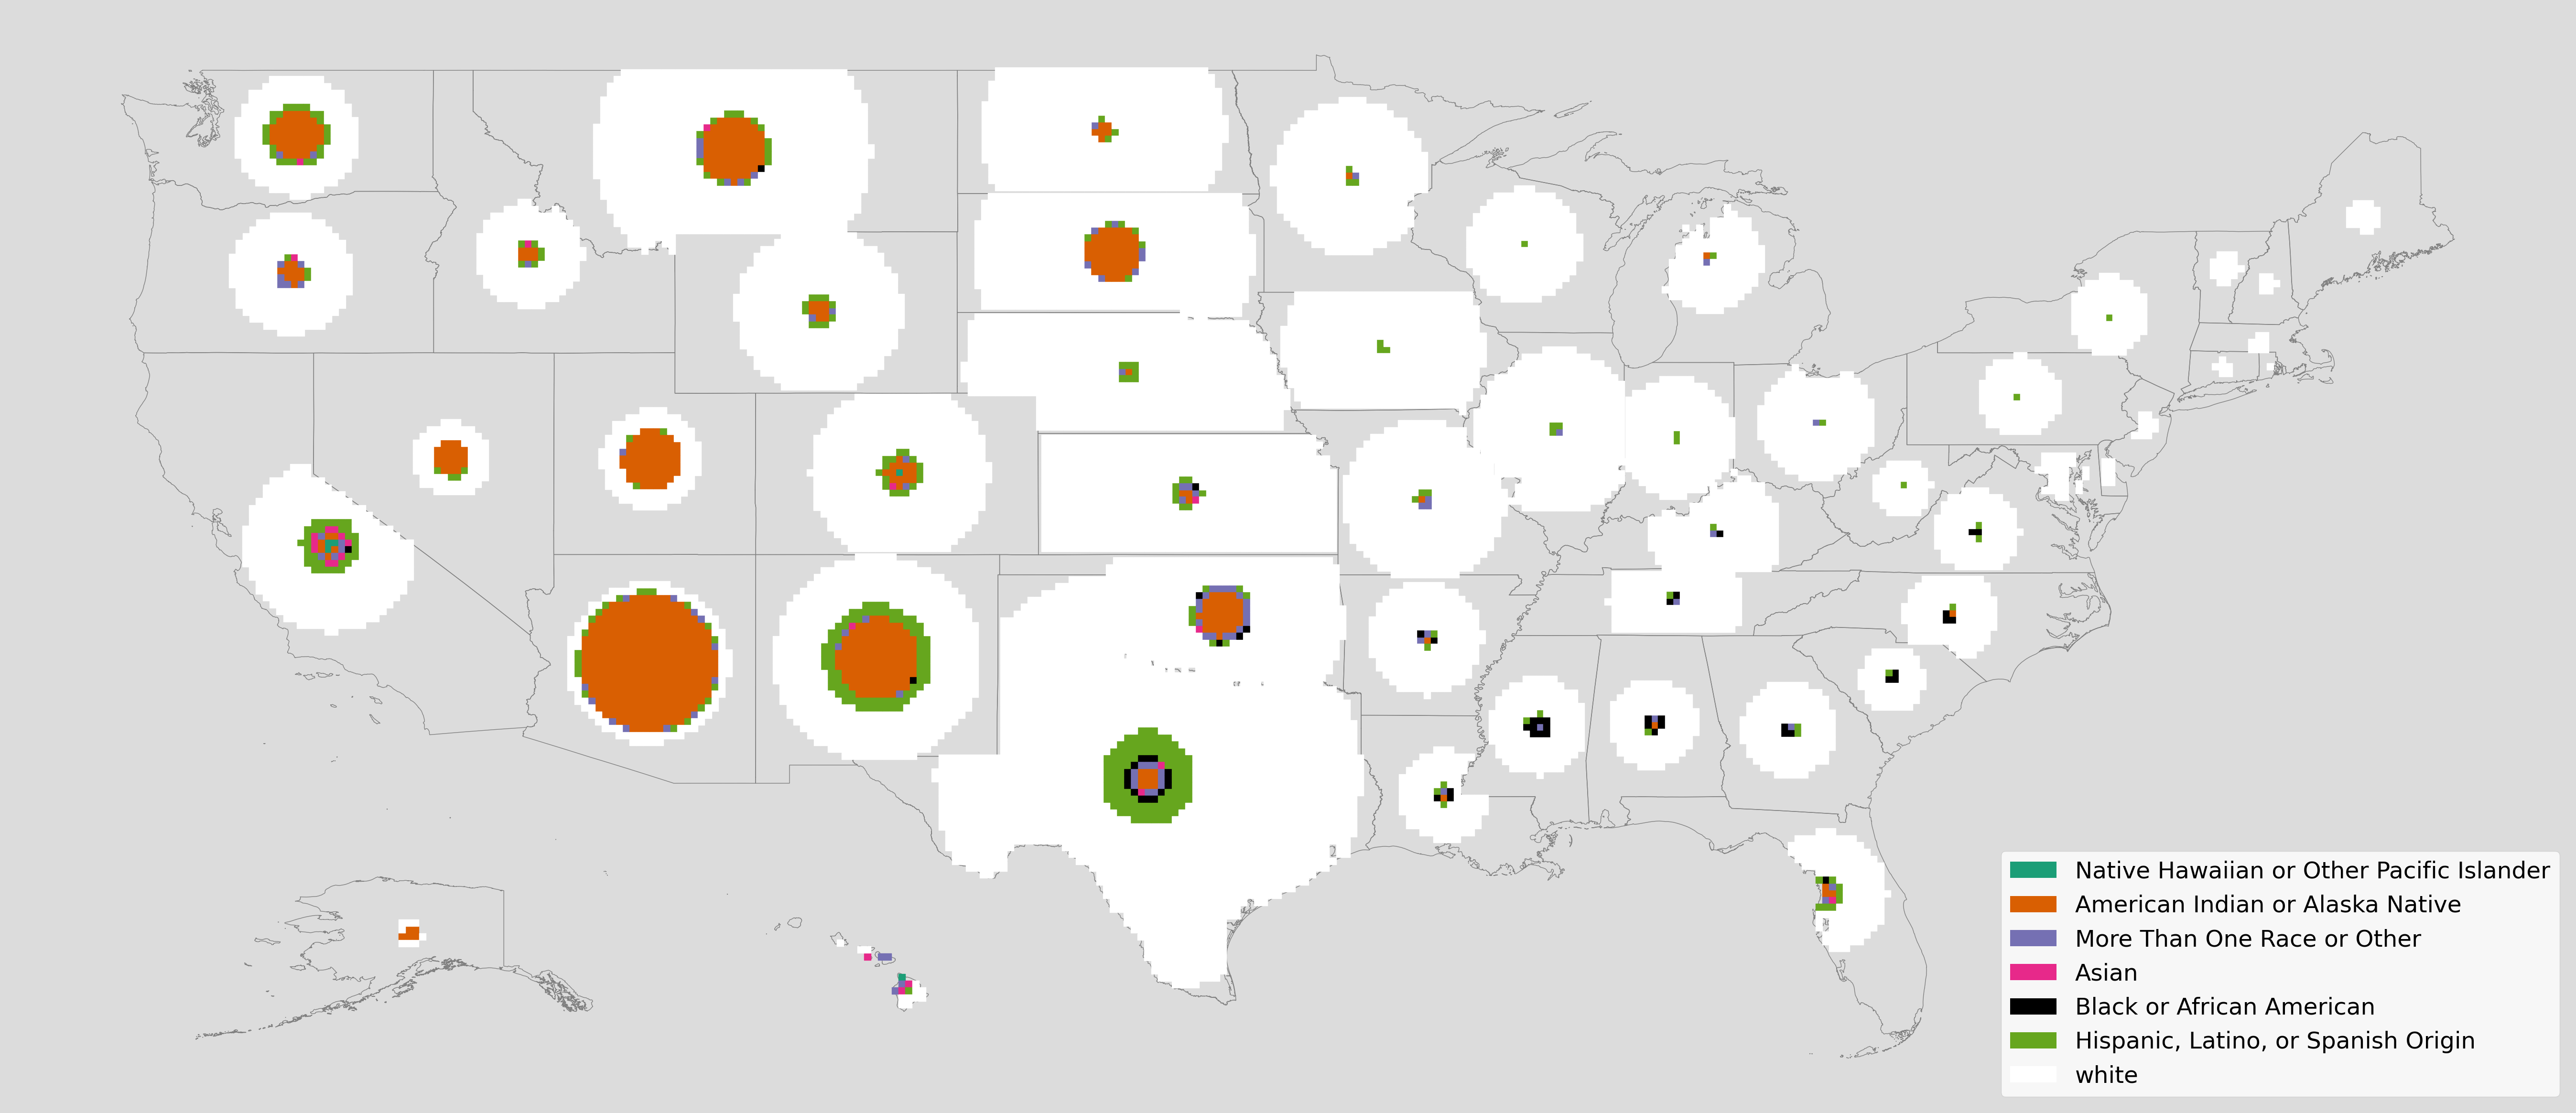

In [157]:
pt_size = 90 # point size
marker_type = "s"
lw_states = 1
c_state_fill = "darkgray"
c_state_plot = "gray"
face= "gainsboro"
a_state_fill = 1
a_state_plot = 1
size_mag=3

plt.figure(figsize=(18*size_mag,8*size_mag), facecolor=face)

# plot grid by color
for i in range(len(state_names)):
    print(state_names[i])
    curr_cols = state_cols[i] # get current state colors
    curr_grid_x = grid_ordered[i][0] # get current grid x points
    curr_grid_y = grid_ordered[i][1] # get current grid y points
    for j in range(len(curr_cols)):
        plt.scatter(curr_grid_x[j], curr_grid_y[j], c=curr_cols[j], marker=marker_type, s=pt_size, zorder=1)
        plt.gca().set_aspect("equal")

# plot original single states
for i in range(len(state_coords_s)):
    curr_coords = state_coords_s[i]
    plt.plot(curr_coords[0], curr_coords[1], c=c_state_plot, lw=lw_states, alpha=a_state_plot, zorder=0)
    #plt.fill(curr_coords[0], curr_coords[1], c=c_state_fill, alpha=a_state_fill, zorder=0)
    plt.gca().set_aspect("equal")\

# plot original multipolygon states
for i in range(len(state_coords_m)):
    curr_coords = state_coords_m[i]
    for j in range(len(curr_coords)):
        plt.plot(curr_coords[j][0], curr_coords[j][1], c=c_state_plot, lw=lw_states, alpha=a_state_plot, zorder=0)
        #plt.fill(curr_coords[j][0], curr_coords[j][1], c=c_state_fill, alpha=a_state_fill, zorder=0)
        plt.gca().set_aspect("equal")

# create legend
legend_elements = [Patch(facecolor="#1b9e77", label='Native Hawaiian or Other Pacific Islander'),
                   Patch(facecolor="#d95f02", label='American Indian or Alaska Native'),
                   Patch(facecolor="#7570b3", label='More Than One Race or Other'),
                   Patch(facecolor="#e7298a", label='Asian'),
                   Patch(facecolor="k", label='Black or African American'),
                   Patch(facecolor="#66a61e", label='Hispanic, Latino, or Spanish Origin'),
                   Patch(facecolor="white", label='white'),
                  ]

plt.legend(handles=legend_elements, loc='lower right',prop={'size': 35})
plt.axis("off")
plt.tight_layout()

plt.savefig("map.png")